
# **INTRODUCCIÓN**
*Informe Creado por Lucia Esteve, Mar Pons y Juan Cornejo - Alumnos Máster Data FS*

*   **OBJETIVO DOCENTE:**
En este informe, se presenta un análisis estadístico de un conjunto de datos que contiene información sobre jugadores de fútbol, en concreto de los mejores defensas según diferentes países.  Se han utilizado técnicas estadísticas para explorar y entender mejor las características de los jugadores, así como para realizar pruebas de hipótesis y comparaciones entre grupos.

*   **OBJETIVO PRÁCTICO:**
Conocer mejor la idiosincrasia y caracteristicas de la muestra, a fin de poder tomar mejores decisiones en el ámbito futbolístico.

*   **ORIGEN DE LA MUESTRA:**
Para la muestra y análisis, se han extraído los datos del ranking de mejores defensas centrales de las mejores competiciones europeas. La fuente ha sido www.wyscout.com y el total de jugadores que comprenden la muestra es de 380.

# **EXPLORACIÓN INICIAL DE DATOS Y ESTADÍSTICA DESCRIPTIVA**

En esta sección se realizaron las siguientes acciones:
*   Importación de librerías y carga de datos y creación de dataframes.
*   Estadística descriptiba básica

El principal objetivo de esta sección es conocer la composición de los datos y las principales caracteristicas de algunas de las variables más relevantes de la muestra (tipo de cada variable, distribución para cada una, sus parámetros y estadísticos).

**IMPORTACIONES BÁSICAS PARA EL ESTUDIO**



In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import math
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.multicomp import pairwise_tukeyhsd




***CREACIÓN DATAFRAME***

In [2]:
#LINKS ARCHIVOS
URL_football = ('/content/bbdd_jutgadores.xlsx')
URL_cuantitative = ('/content/bbdd_jutgadores_sin_cuantitativas.xlsx')
df_football = pd.read_excel(URL_football)
df_football_quantitative = pd.read_excel (URL_cuantitative)

# VARIABLES CUANTITATIVAS


El siguiente gráfico muestra las diez nacionalidades más comunes de los jugadores de la muestra.

**TOP 10 NACIONALIDADES**

In [3]:
tab = pd.crosstab(index=df_football['País de nacimiento'], columns='count')
tab2 = tab.sort_values('count', ascending=False)
tab2.head(10)

col_0,count
País de nacimiento,
Spain,40
Brazil,31
France,25
Netherlands,24
Austria,22
Germany,21
Switzerland,21
Serbia,20
Czech Republic,20


**HISTOGRAMA - DUELOS DEFENSIVOS GANADOS %**


El histograma representa la distribución de las tarjetas amarillas por 90 minutos. De cara a utilizar el Histograma, necesitamos variables de caracter continuo, es por ello que escogimos utilizar esta variable ya que nos permite observar mejor la creación del Histograma.



In [4]:
from vega_datasets import data

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(df_football).mark_bar().encode(
  x=alt.X('Tarjetas amarillas/90', bin=True),
  y='count()',
)

alt.Chart(...)

**GRÁFICO DE DENSIDAD DE LA VARIABLE EDAD**

Como se ve en el gráfico de Densidad, la variable "Edad" tiene un comportamiento similar al de una distribución Normal.

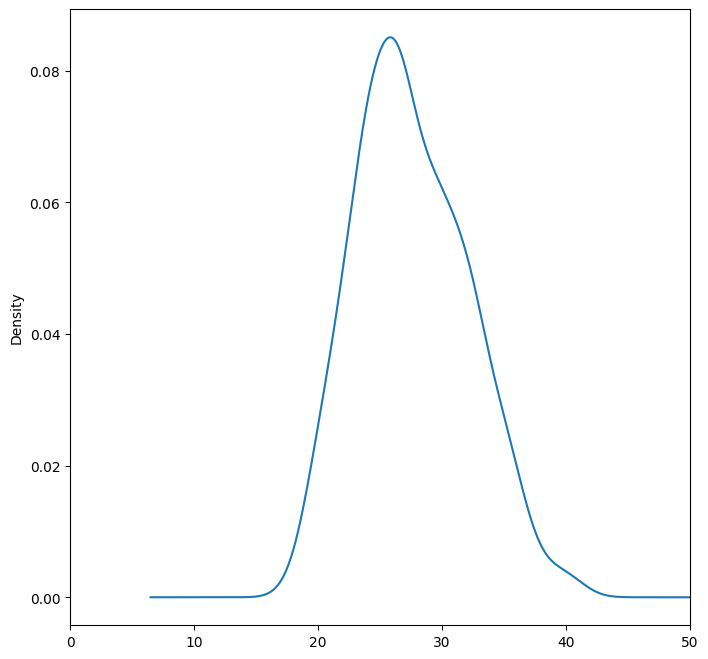

In [5]:
df_football["Edad"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,50));

**DESCRIPCIÓN DE VARIABLES**

In [6]:
df_football.describe()

,Edad,Valor de mercado (Transfermarkt),Partidos jugados,Minutos jugados,Altura,Acciones defensivas realizadas/90,Duelos defensivos/90,Duelos defensivos ganados%,Duelos aéreos en los 90,"Duelos aéreos ganados, %",...,Tarjetas amarillas,Tarjetas amarillas/90,Tarjetas rojas,Tarjetas rojas/90,Goles de cabeza,Goles de cabeza/90,Pases hacia adelante/90,"Precisión pases hacia adelante, %",Pases largos/90,"Precisión pases largos, %"
count,379.000000,3.790000e+02,379.000000,379.000000,380.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,379.000000,373.000000,379.000000,373.000000,379.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,27.580475,8.445053e+06,33.997361,2986.944591,187.768421,8.863941,5.513324,67.844531,4.152547,57.101555,...,5.963061,0.182949,0.398417,0.012976,0.883905,0.025952,19.228204,78.131662,5.555147,55.194129
std,4.491702,1.410954e+07,11.479104,1143.573907,4.325668,1.461940,1.308814,5.192163,1.335772,7.201078,...,3.396809,0.088487,0.656347,0.022421,1.169375,0.033432,4.140219,5.786818,1.836352,6.185279
min,18.000000,0.000000e+00,2.000000,12.000000,174.000000,4.820000,2.700000,46.460000,0.810000,36.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.540000,59.660000,1.920000,38.930000
25%,24.000000,6.000000e+05,26.000000,2221.000000,185.000000,7.790000,4.640000,64.790000,3.240000,52.050000,...,3.000000,0.120000,0.000000,0.000000,0.000000,0.000000,16.170000,74.410000,4.240000,50.720000
50%,27.000000,2.500000e+06,34.000000,2999.000000,188.000000,8.810000,5.400000,68.130000,4.040000,57.270000,...,6.000000,0.180000,0.000000,0.000000,0.000000,0.020000,18.910000,78.100000,5.410000,55.060000
75%,31.000000,1.000000e+07,42.000000,3737.500000,191.000000,9.800000,6.230000,71.350000,4.910000,62.260000,...,8.000000,0.240000,1.000000,0.020000,1.000000,0.040000,22.020000,81.810000,6.630000,59.620000
max,41.000000,7.500000e+07,62.000000,6141.000000,198.000000,12.860000,10.010000,81.030000,9.540000,76.190000,...,22.000000,0.540000,3.000000,0.120000,6.000000,0.170000,33.030000,92.740000,12.540000,75.640000


Tras realizar un análisis preliminar mediante ".Describe", vemos alguna conclusión muy interesante en cuanto a cómo se comportan las variables. Vemos por ejemplo la gran diferencia en cuanto a la media y la desviación típica en la variable "Valor de mercado", lo que indica la gran variabilidad que tienen los jugadores de la muestra en ese aspecto.

Otra información interesante:

Interpretando estos datos específicos para algunas columnas:
*   **Edad**: La edad promedio de los jugadores de fútbol en el conjunto de datos es aproximadamente 27.58 años. La edad mínima es 18 años y la máxima es 41 años.
*   **Partidos jugados**: Los jugadores han jugado un promedio de aproximadamente 34 partidos, con un mínimo de 2 partidos y un máximo de 62 partidos.
*   **Minutos jugados**: La media de minutos jugados es de aproximadamente 2987 minutos, con un mínimo de 12 minutos y un máximo de 6141 minutos.


**CORRELACIÓN**

Realizamos un análisis de correlación conocer mejor las interacciones entre ellas.

In [7]:
corr_matrix = df_football_quantitative.corr(method='pearson')
corr_matrix

,Edad,Valor de mercado (Transfermarkt),Partidos jugados,Minutos jugados,Altura,Acciones defensivas realizadas/90,Duelos defensivos/90,Duelos defensivos ganados%,Duelos aéreos en los 90,"Duelos aéreos ganados, %",...,Tarjetas amarillas,Tarjetas amarillas/90,Tarjetas rojas,Tarjetas rojas/90,Goles de cabeza,Goles de cabeza/90,Pases hacia adelante/90,"Precisión pases hacia adelante, %",Pases largos/90,"Precisión pases largos, %"
Edad,1.000000,-0.150421,-0.062618,-0.045694,-0.101171,-0.210544,-0.297921,-0.023626,0.089074,0.154377,...,-0.064133,-0.044168,-0.062502,-0.032644,0.040566,0.041953,-0.049097,0.048899,0.091061,0.165326
Valor de mercado (Transfermarkt),-0.150421,1.000000,0.354472,0.325168,-0.033554,-0.244484,-0.103981,-0.030963,-0.201862,0.034387,...,0.154342,-0.057601,0.004491,-0.067053,0.176531,0.075248,0.270529,0.460041,-0.205816,0.172452
Partidos jugados,-0.062618,0.354472,1.000000,0.964795,-0.044084,-0.232394,-0.144582,-0.063096,-0.135165,-0.017804,...,0.547385,-0.072311,0.074930,-0.132880,0.355512,0.049343,0.237094,0.260072,-0.014356,0.059050
Minutos jugados,-0.045694,0.325168,0.964795,1.000000,0.001497,-0.225555,-0.191810,0.003368,-0.099239,0.022649,...,0.559481,-0.105086,0.091948,-0.115780,0.376072,0.070531,0.229719,0.218450,0.039148,0.040094
Altura,-0.101171,-0.033554,-0.044084,0.001497,1.000000,0.089291,-0.121303,0.210308,0.348877,0.373978,...,-0.008872,-0.043821,-0.042954,-0.044853,0.144496,0.199283,-0.041784,-0.083644,0.076578,-0.000899
Acciones defensivas realizadas/90,-0.210544,-0.244484,-0.232394,-0.225555,0.089291,1.000000,0.753649,0.224558,0.284080,0.009303,...,0.073392,0.257788,0.014871,0.050973,-0.127989,-0.079181,-0.141075,-0.486869,0.150837,-0.187815
Duelos defensivos/90,-0.297921,-0.103981,-0.144582,-0.191810,-0.121303,0.753649,1.000000,0.032967,0.070210,-0.202379,...,0.126901,0.313673,0.020263,0.046748,-0.157043,-0.138117,-0.103494,-0.308077,-0.017927,-0.153701
Duelos defensivos ganados%,-0.023626,-0.030963,-0.063096,0.003368,0.210308,0.224558,0.032967,1.000000,0.198420,0.075012,...,-0.116870,-0.158626,0.020505,-0.001686,0.127815,0.142263,-0.010258,-0.044265,0.017178,-0.017795
Duelos aéreos en los 90,0.089074,-0.201862,-0.135165,-0.099239,0.348877,0.284080,0.070210,0.198420,1.000000,0.259292,...,0.050032,0.107649,-0.014078,-0.015217,0.194906,0.261966,-0.227621,-0.321956,0.117108,-0.069474
"Duelos aéreos ganados, %",0.154377,0.034387,-0.017804,0.022649,0.373978,0.009303,-0.202379,0.075012,0.259292,1.000000,...,-0.010995,-0.052135,-0.028315,-0.000368,0.192386,0.212362,-0.087174,-0.004992,-0.003411,0.076283


Se calculó la matriz de correlación entre las variables cuantitativas del conjunto de datos de jugadores de fútbol. La matriz de correlación proporciona información sobre la relación lineal entre pares de variables, donde los valores cercanos a 1 indican una correlación positiva fuerte, valores cercanos a -1 indican una correlación negativa fuerte, y valores cercanos a 0 indican una correlación débil o inexistente.

A priori, los resultados parecen tener sentido lógico.


*   Elemento de lista **texto en negrita**
*   Elemento de lista


Se observaron las siguientes correlaciones destacadas:

1.	**Valor de Mercado (Transfermarkt):**
*  Tiene una correlación moderada positiva con el número de partidos jugados (0.35) y los minutos jugados (0.33). Esto sugiere que los jugadores que juegan más partidos y acumulan más minutos tienden a tener un valor de mercado más alto.
*  También está correlacionado positivamente con la precisión de los pases hacia adelante (0.46) y la precisión de los pases largos (0.17). Esto indica que los jugadores con una mayor precisión en sus pases pueden tener un valor de mercado más alto.
2.	**Partidos Jugados y Minutos Jugado**s:
*  	Tienen una correlación muy fuerte entre sí (0.96), lo que es esperado, ya que los minutos jugados aumentan con la cantidad de partidos disputados.
3.	**Acciones Defensivas Realizadas/90 y Duelos Defensivos/90:**
*  	Estas dos variables tienen una correlación muy fuerte entre sí (0.75), lo que sugiere que los jugadores que realizan más acciones defensivas también tienden a participar en más duelos defensivos.
4.	**Faltas/90 y Tarjetas Amarillas:**
*  	Tienen una correlación notable (0.56), lo que sugiere que los jugadores que cometen más faltas tienden a recibir más tarjetas amarillas.
5.	**Precisión de Pases Hacia Adelante y Precisión de Pases Largos:**
*  Estas dos variables tienen una correlación moderada negativa (-0.44), lo que indica que los jugadores que realizan más pases largos tienden a tener una precisión ligeramente menor en sus pases hacia adelante.

**Conclusiones:**
*   El valor de mercado de un jugador parece estar influido por factores como la cantidad de partidos jugados, los minutos acumulados en el campo y la precisión de sus pases.
*   Existe una relación entre las acciones defensivas realizadas y los duelos defensivos, lo que sugiere que los jugadores activos en la defensa tienden a participar en más duelos.
*   La cantidad de faltas cometidas está relacionada con el número de tarjetas amarillas recibidas, lo que indica que los jugadores disciplinariamente indisciplinados reciben más tarjetas.
*   La precisión en los pases largos parece afectar ligeramente la precisión de los pases hacia adelante, lo que podría ser importante en la valoración de jugadores con roles específicos en el campo, como los centrocampistas creativos o los defensores que inician el juego desde atrás.


# DISTRIBUCIONES

Se exploraron las distribuciones de las variables cuantitativas utilizando diferentes métodos, incluyendo ajustes de distribuciones a los datos.

**Variables con distribución normal**:
Las variables Edad, Valor de mercado (Transfermarkt), Partidos jugados, Minutos jugados, Altura, Duelos defensivos ganados%, Goles de cabeza, Goles de cabeza/90 y Precisión pases hacia adelante, % tienen distribuciones aproximadamente normales. Esto significa que los valores de estas variables se distribuyen de manera relativamente simétrica alrededor de la media, lo que sugiere que la mayoría de los datos se encuentran cerca de la media y hay una menor dispersión en los extremos.

**Variables con distribución t de Student**:
Las variables Acciones defensivas realizadas/90, Duelos defensivos/90, Duelos aéreos en los 90, Duelos aéreos ganados, %, Entradas/90, Posesión conquistada después de una entrada, Tiros interceptados/90, Interceptaciones/90, Posesión conquistada después de una interceptación, Faltas/90, Tarjetas amarillas, Tarjetas amarillas/90, Tarjetas rojas, Pases hacia adelante/90, Pases largos/90 y Precisión pases largos, % tienen distribuciones que siguen una distribución t de Student. Esto sugiere que estas variables pueden tener valores atípicos o una mayor variabilidad en los datos en comparación con una distribución normal.

**Variables con distribución indefinida**:
Las variables Tarjetas rojas y Tarjetas rojas/90 tienen una distribución indefinida, lo que puede deberse a que todos los valores son iguales a cero en el conjunto de datos proporcionado.
En resumen, este análisis proporciona información valiosa sobre la distribución de las variables, lo que nos ayuda a comprender mejor la naturaleza de nuestros datos y a tomar decisiones informadas al realizar análisis estadísticos o modelado.



In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings

# Ignorar advertencias específicas conocidas durante el ajuste de distribuciones
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Lista de distribuciones a probar, con enfoque en las continuas
distributions = [
    stats.norm,       # Normal
    stats.expon,      # Exponencial
    stats.uniform,    # Uniforme
    stats.t,          # t de Student
    stats.poisson     # Poisson
]

def best_fit_distribution(data, bins=200):
    """Encuentra la mejor distribución para una serie."""
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    best_distribution_name = None
    best_params_dict = {}
    best_sse = np.inf

    for distribution in distributions:
        # Intentar ajustar la distribución
        try:
            # Parámetros óptimos para la distribución
            params = distribution.fit(data)

            # Kolmogorov-Smirnov test
            D, p = stats.kstest(data, distribution.name, args=params)

            if D < best_sse:
                best_distribution_name = distribution.name
                best_params = params
                best_sse = D
                # Convierte los parámetros a un diccionario con nombres clave
                param_names = (distribution.shapes + ', loc, scale').split(', ') if distribution.shapes else ['loc', 'scale']
                best_params_dict = {param_names[i]: param for i, param in enumerate(best_params)}
        except Exception:
            pass

    return best_distribution_name, best_params_dict

def fit_all_columns(df):
    """Ajusta todas las columnas de un DataFrame y devuelve los resultados en un DataFrame más legible, evitando la notación científica."""
    results = []

    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column].dropna()  # Elimina NaNs
        best_fit, params_dict = best_fit_distribution(data)
        result = {'Variable': column, 'Mejor Distribución': best_fit}

        # Formatea los parámetros para evitar la notación científica, usando 4 decimales como ejemplo
        formatted_params = {k: f'{v:.4f}' for k, v in params_dict.items()}

        result.update(formatted_params)  # Agrega los parámetros del ajuste
        results.append(result)

    results_df = pd.DataFrame(results)
    return results_df

# Ejemplo de uso
# Asume df_football_quantitative como tu DataFrame de fútbol con variables cuantitativas
results_df = fit_all_columns(df_football_quantitative)
display(results_df)

,Variable,Mejor Distribución,loc,scale,df
0,Edad,norm,27.5805,4.4858,NaN
1,Valor de mercado (Transfermarkt),norm,8445052.7704,14090916.2855,NaN
2,Partidos jugados,norm,33.9974,11.4640,NaN
3,Minutos jugados,norm,2986.9446,1142.0642,NaN
4,Altura,norm,187.7684,4.3200,NaN
5,Acciones defensivas realizadas/90,t,8.8639,1.4600,661666059.0005
6,Duelos defensivos/90,t,5.4829,1.2313,17.6107
7,Duelos defensivos ganados%,norm,67.8445,5.1852,NaN
8,Duelos aéreos en los 90,t,4.0980,1.1809,9.2913
9,"Duelos aéreos ganados, %",t,57.1016,7.1912,33886.7784


Utilizamos el código arriba referido para "anticipar" o conocer por encima cuál es la distribución que asignaría el código a cada una de las variables. No obstante, y tal como aprendimos en clase, esta herramienta es útil para echar un vistazo rápido al total de la muestra, pero nunca ha de prevarecer por encima del criterio del propio profesional que se encuentra analizando la muestra, ya que el algoritmo no siempre tiene una precisión exacta.

**DISTRIBUCIÓN ESPECÍFICA**

Text(0.5, 1.0, 'Densidad Edad')

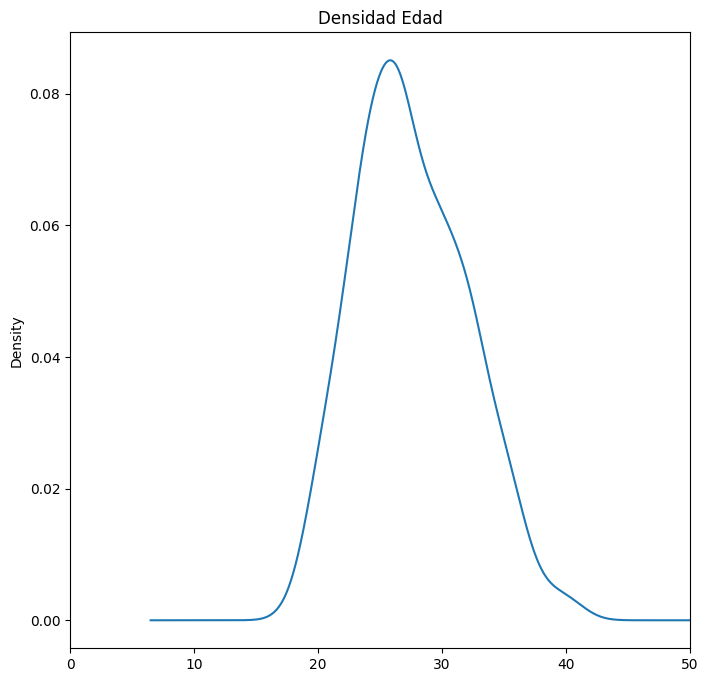

In [9]:
df_football["Edad"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,50));
plt.title('Densidad Edad')

Text(0.5, 1.0, 'Densidad Minutos jugados')

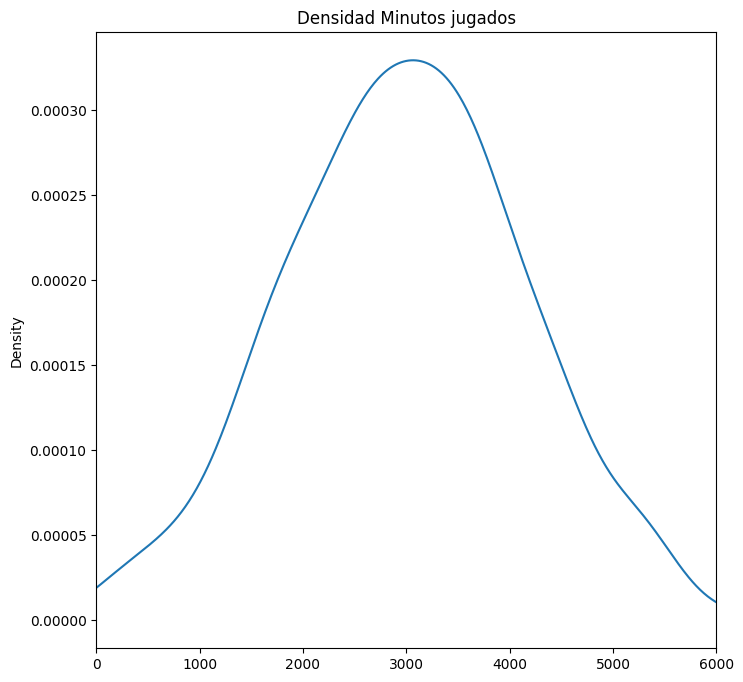

In [10]:
df_football["Minutos jugados"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,6000));
plt.title('Densidad Minutos jugados')

Text(0.5, 1.0, 'Densidad Tarjetas amarillas')

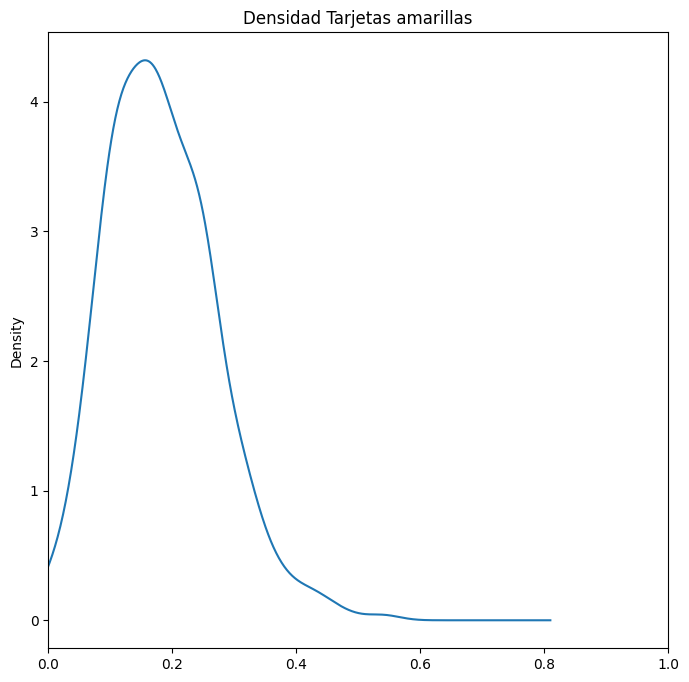

In [11]:
df_football["Tarjetas amarillas/90"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,1));
plt.title('Densidad Tarjetas amarillas')

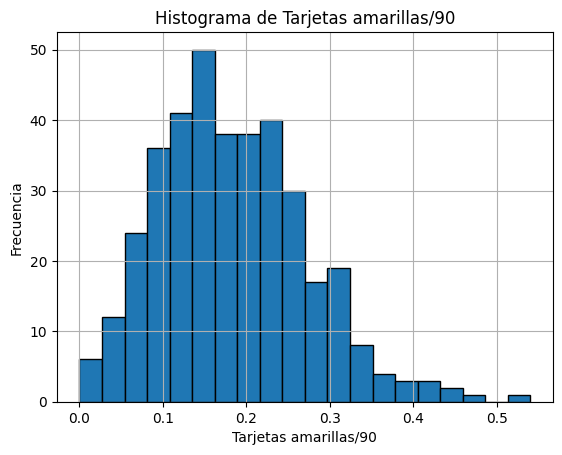

In [12]:
plt.hist(df_football_quantitative["Tarjetas amarillas/90"].dropna(), bins=20, edgecolor='black')

plt.title('Histograma de Tarjetas amarillas/90')
plt.xlabel('Tarjetas amarillas/90')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# CÁLCULO DE PROBABILIDADES

**PROBABILIDAD DEFENSA <= 20 AÑOS Y VM >=10M**

Nos proponemos calcular cuál es la probabilidad de encontrar un defensa con una edad inferior o igual a 20 años y un valor mayor o igual a 10M€. El objetivo a nivel profesional es claro, ¿qué tan interesante puede ser un jugador joven que ya se encuentre en el ranking y su valor sea bajo? ¿Qué probabilidad hay de que vuelva a haber otro jugador así? ¿Es necesario que el club acelere su contratación?

En este primer caso, hemos excluído del análisis a los jugadores mayores de 20 años y hemos calculado la probabilidad.

In [13]:
import pandas as pd
from scipy import stats

# Asumiendo que df_football_quantitative es tu DataFrame

edad_comprobar =20
jugadores_jovenes = df_football[df_football["Edad"] <= edad_comprobar]

# Calcula la media y la desviación estándar de "Valor de mercado (Transfermarkt)" para estos jugadores
media_valor_mercado = jugadores_jovenes["Valor de mercado (Transfermarkt)"].mean()
std_valor_mercado = jugadores_jovenes["Valor de mercado (Transfermarkt)"].std()

# Calcula la probabilidad de que "Valor de mercado (Transfermarkt)" sea superior a 10,000,000
probabilidad = 1 - stats.norm(media_valor_mercado, std_valor_mercado).cdf(10000000)

print(f"La probabilidad de que el 'Valor de mercado (Transfermarkt)' sea superior a 10,000,000 para jugadores con edad < {edad_comprobar}] es de {probabilidad:.2%}")

La probabilidad de que el 'Valor de mercado (Transfermarkt)' sea superior a 10,000,000 para jugadores con edad < 20] es de 0.01%


Por lo tanto, concluímos que la aparición de un jugador de las caracteristicas antes referidas es muy baja y por tanto, ha de ser de gran interés para el club.

**PROBABILIDAD DEFENSA <= 20 AÑOS Y VM >=10M** - Mediante cálculo con distribución

Realizamos el mismo cálculo pero mediante un método alternativo. En este caso, no excluimos a los jugadores mayores del análisis, sino que realizamos un cálculo de probabilidad conjunta (prob para edad, prob para valor). En cualquier caso, el resultado sigue en línea con el método anterior y nos habla de la relevancia de encontrar jugadores jovenes que estén en las listas y su valor sea inferior a 10m€.

In [14]:
stats.uniform.cdf(x=20,         # Cutoff value (quantile) to check
                  loc=27.5805,         # Distribution start
                  scale=4.4858)      # Distribution end


0.0

In [16]:
from scipy.stats import norm

# Parámetros para la edad
mu_edad = 27.5805
sigma_edad = 4.4858

# Parámetros para el valor de mercado
mu_valor_mercado = 8445052.7704
sigma_valor_mercado = 14090916.2855

# Cálculo de la probabilidad de que un jugador tenga 20 años o menos
prob_edad_20_o_menos = norm.cdf(x=20, loc=mu_edad, scale=sigma_edad)

# Cálculo de la probabilidad de que un jugador tenga un valor de mercado inferior a 10 millones de euros
prob_valor_mercado_menos_10m = norm.cdf(x=10000000, loc=mu_valor_mercado, scale=sigma_valor_mercado)

# Probabilidad conjunta
prob_conjunta = prob_edad_20_o_menos * prob_valor_mercado_menos_10m

print(f"Probabilidad de que un jugador tenga 20 años o menos y un valor de mercado inferior a 10 millones: {prob_conjunta}")


Probabilidad de que un jugador tenga 20 años o menos y un valor de mercado inferior a 10 millones: 0.024762446172983857


**SESIÓN 3 - INTERVALOS DE CONFIANZA E HIPÓTESIS**

# INTERVALOS DE CONFIANZA DE HIPÓTESIS

Se calcularon intervalos de confianza para la media de la edad de los jugadores, que es de 27.58 años y se realizaron pruebas de hipótesis, incluyendo:

•	Prueba de hipótesis para una muestra sobre la edad de los jugadores italianos.

•	Prueba de hipótesis para dos muestras sobre la edad de jugadores brasileños y españoles.

En cuanto a los intervalos de confianza, los resultados muestran tres intervalos de confianza para la media de las edades con niveles de confianza del 90%, 95% y 99%, respectivamente. Estos intervalos indican el rango dentro del cual se espera que esté la verdadera media poblacional de las edades con cierto nivel de confianza. Por ejemplo, el intervalo de confianza al 95% indica que podemos estar razonablemente seguros de que la verdadera media de las edades de los jugadores de fútbol está entre 23.43 y 31.73 años.

**MEDIA MUESTRAL**

In [17]:
edad_media = df_football["Edad"].mean()
print ("Media Muestral del atributo EDAD")
print (edad_media)

Media Muestral del atributo EDAD
27.58047493403694


**DESCRIBED VARIABLE "EDAD"**

In [18]:
df_football["Edad"].describe()

count    379.000000
mean      27.580475
std        4.491702
min       18.000000
25%       24.000000
50%       27.000000
75%       31.000000
max       41.000000
Name: Edad, dtype: float64

**INTERVALO DE CONFIANZA 95%**

In [19]:
edades = df_football["Edad"]

# Cálculo de valores necesarios
sample_mean = np.mean(df_football["Edad"])  # Media de la muestra
pop_stdev = np.std(df_football["Edad"], ddof=1)  # Desviación estándar de la muestra como aproximación de la poblacional
sample_size = len(df_football["Edad"])  # Tamaño de la muestra

# Ajustando el código para usar el argumento correcto
intervalo_confianza_corregido_90 = stats.norm.interval(confidence=0.90, loc=sample_mean, scale=pop_stdev/math.sqrt(4.491702)) #Aquí incluir la std de la variable EDAD.
intervalo_confianza_corregido_95 = stats.norm.interval(confidence=0.95, loc=sample_mean, scale=pop_stdev/math.sqrt(4.491702)) #Aquí incluir la std de la variable EDAD.
intervalo_confianza_corregido_99 = stats.norm.interval(confidence=0.99, loc=sample_mean, scale=pop_stdev/math.sqrt(4.491702)) #Aquí incluir la std de la variable EDAD.

#A mayor confianza, un rango más amplio para escoger.
print (f'INTERVALO CONFIANZA AL 90% {intervalo_confianza_corregido_90}')
print (f'INTERVALO CONFIANZA AL 95% {intervalo_confianza_corregido_95}')
print (f'INTERVALO CONFIANZA AL 99% {intervalo_confianza_corregido_99}')

INTERVALO CONFIANZA AL 90% (24.094432220481234, 31.066517647592644)
INTERVALO CONFIANZA AL 95% (23.42659883516444, 31.734351032909437)
INTERVALO CONFIANZA AL 99% (22.12135636696895, 33.03959350110493)


**CONTRASTE DE HIPOTESIS (UNA MUESTRA)**

Nuestro objetivo es contrastar si la media de edad de los jugadores de nacionalidad "Italiana" es menor de 25 años.


H0 uItaliano >=25

H1 uItaliano <25

Primero creamos el dataframe y hacemos un .describe sobre él.

In [20]:
edades_italia = df_football[df_football['País de nacimiento'] == 'Italy']['Edad']
describe_italia = edades_italia.describe()
print("\n" + "-"*50 + "\n") #Para mayor claridad.
print("Estadísticas de las edades de jugadores nacidos en Italia:")
print(describe_italia)


--------------------------------------------------

Estadísticas de las edades de jugadores nacidos en Italia:
count     9.000000
mean     27.555556
std       4.824705
min      21.000000
25%      24.000000
50%      27.000000
75%      29.000000
max      36.000000
Name: Edad, dtype: float64


Ahora realizamos el test.

In [21]:
t_stat, p_valor = stats.ttest_1samp(edades_italia, popmean=25)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)

Estadístico t: 1.5890436324629746
Valor p: 0.15071365351428936


El p valor es de 0.15, superior al 0.05. Por lo tanto, no tenemos evidencias estadísticas para rechazar la hipotesis nula. Aceptamos H0 y que la media de la edad de los jugadores Italianos es mayor o igual a 25 años.

**CONTRASTE DE HIPOTESIS (DOS MUESTRAS)**

Nuestro objetivo es contrastar si la media de edad de los jugadores de nacionalidad "Brasil" es igual a la media de los jugadores de nacionalidad "España":


H0 uBrazil = uEspana

# H1 uBrazil <> uEspana

Primero creamos dos dataframes en función de la nacionalidad para luego analizar como se comporta la edad en cada uno de los grupos.

In [22]:
edades_brasil = df_football[df_football['País de nacimiento'] == 'Brazil']['Edad']
edades_espana = df_football[df_football['País de nacimiento'] == 'Spain']['Edad']

describe_brasil = edades_brasil.describe()
describe_espana = edades_espana.describe()

print("\n" + "-"*50 + "\n") #Para mayor claridad.
print("Estadísticas de las edades de jugadores nacidos en Brasil:")
print(describe_brasil)
print("\n" + "-"*50 + "\n") #Para mayor claridad.

print("Estadísticas de las edades de jugadores nacidos en España:")
print(describe_espana)



--------------------------------------------------

Estadísticas de las edades de jugadores nacidos en Brasil:
count    31.000000
mean     29.354839
std       4.827341
min      22.000000
25%      26.000000
50%      28.000000
75%      32.000000
max      41.000000
Name: Edad, dtype: float64

--------------------------------------------------

Estadísticas de las edades de jugadores nacidos en España:
count    40.000000
mean     29.225000
std       4.486375
min      22.000000
25%      26.000000
50%      29.000000
75%      33.250000
max      38.000000
Name: Edad, dtype: float64


Con esta información, aplicaremos un test de Levene para comprobar si las varianzas de ambas muestras son efectivamente iguales.

En este caso, la hipótesis será:

H0 Var(Brazil) = Var(Espana)

H1 Var (Brazil) <> Var (Espana)

In [23]:
levene_test_stat, levene_p_value = stats.levene(edades_brasil, edades_espana)

print("Estadístico de prueba de Levene:", levene_test_stat)
print("Valor p de la prueba de Levene:", levene_p_value)

Estadístico de prueba de Levene: 0.06982683943310165
Valor p de la prueba de Levene: 0.7923767481569786


El p valor es de 0.79, superior al 0.05. Por lo tanto, no tenemos evidencias estadística para rechazar la hipotesis nula. Aceptamos H0 y que las Varianzas de ambos grupos son iguales.

Ahora sí, podemos proceder al cálculo del T-test con dos muestras independientes.

El p valor es de 0.90, superior al 0.05. Por lo tanto, **no tenemos evidencias estadística para rechazar la hipotesis nula. Aceptamos H0 y que la media de las edades de los jugadores de Brasil y de España son iguales.**

In [24]:
# Realizar la prueba t para muestras independientes
t_stat, p_valor = stats.ttest_ind(edades_brasil, edades_espana, equal_var=True)

t_stat, p_valor

(0.116999216066195, 0.9072005637114491)

**SESIÓN 4** - **ANOVA**

Se realizó un análisis de varianza (ANOVA) para investigar si hay diferencias significativas en las edades de los jugadores según su país de origen. Esto incluyó:

*   Comprobación de los supuestos necesarios para ANOVA.
*   Realización del test ANOVA y análisis de los resultados.
*   Posterior aplicación de la prueba de Tukey para identificar diferencias entre grupos, en concreto, para comparar las medias de las edades entre los diferentes grupos definidos por los códigos de país. Este test, es útil para determinar si las diferencias en las medias de edad entre los países son estadísticamente significativas. En nuestro análisis, si comparamos los grupos 4 y 5 con otros grupos, para estas filas específicas, no hay diferencias significativas en las medias entre esos grupos.

Aplicaremos ANOVA: queremos comprobar si hay diferencia significativa de edades por país en cuanto a los mejores delanteros del mundo

- Para comparar diferentes grupos

1. anova con python
2. interpreto el P valor
3. hipotesisi nula de igualdad, analisisi de si hay alguna diferente al resto
4. t test corregidos que son tuquey o bonferroni para analizar si hay alguba diferente al resto  --> no nos sale diferente al 95% lo hacemos al 90%

In [25]:
import scipy.stats as stats

# Definir los grupos de edades por país de nacimiento
edades_brasil = df_football[df_football['País de nacimiento'] == 'Brazil']['Edad']
edades_espana = df_football[df_football['País de nacimiento'] == 'Spain']['Edad']
edades_serbia = df_football[df_football['País de nacimiento'] == 'Serbia']['Edad']
edades_france = df_football[df_football['País de nacimiento'] == 'France']['Edad']
edades_argentina = df_football[df_football['País de nacimiento'] == 'Argentina']['Edad']
edades_denmark = df_football[df_football['País de nacimiento'] == 'Denmark']['Edad']
edades_uruguay = df_football[df_football['País de nacimiento'] == 'Uruguay']['Edad']


Para poder realizar Anova tenemos que comprobar primero si la variable cuantitativa se comporta como una distribución normal en cada grupo

Para comprobarlo primero vamos a hacer un grafico de densidad, este código generará un gráfico de densidad que compara las distribuciones de edad en cada país.

Cada país se representará con una curva de densidad de diferente color y sombreado.

Esto nos permite observar las diferencias en las distribuciones de edad entre los países y pare que todas las curvas de densidad se comportan como una normal

Es verdad que si nos fijamos en el gráfico de boxplots podemos ver que tanto Argentina como Brasil, a primera vista podrían no comportarse como una normal pero teniendo en cuenta que la N (muetra poblacional) para cada uno de los grupos no es muy grande y entendiendo que la edad es una variable que se suele comportar como una normal podríamos decir que se compporta como una normal y por tanto se puede realizar Anova.

<ipython-input-26-b2464f5b33db>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edades_pais, label=pais, shade=True)
<ipython-input-26-b2464f5b33db>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edades_pais, label=pais, shade=True)
<ipython-input-26-b2464f5b33db>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edades_pais, label=pais, shade=True)
<ipython-input-26-b2464f5b33db>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edades_pais, label=pais, shade=True)
<ipython-input-26-b2464f5b33

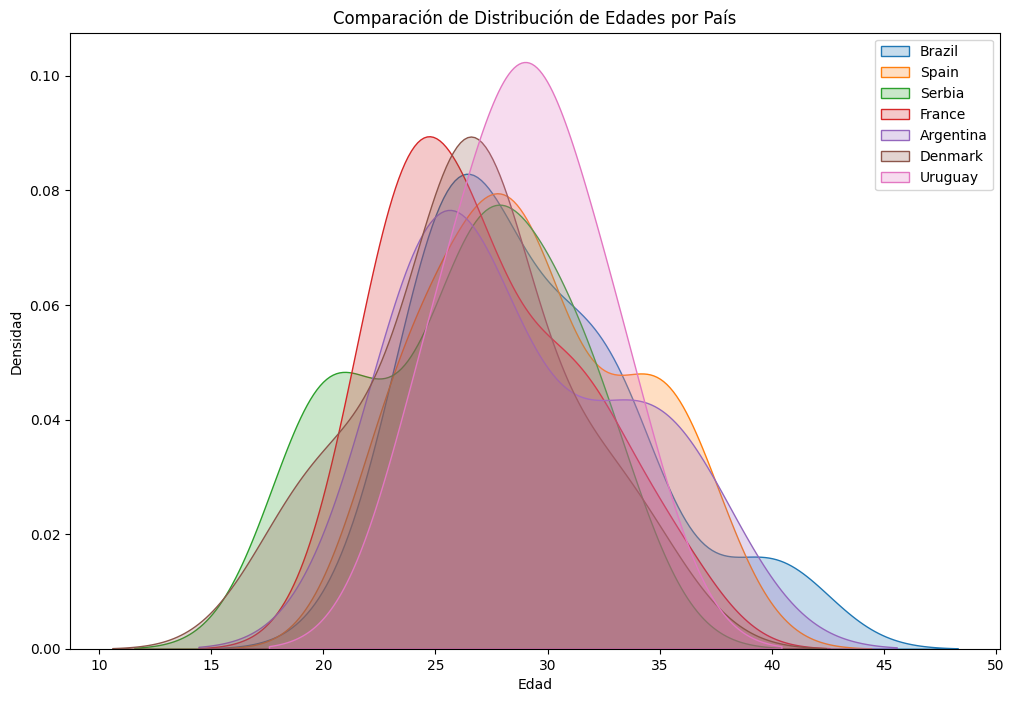

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una lista de países
paises = ['Brazil', 'Spain', 'Serbia', 'France', 'Argentina', 'Denmark', 'Uruguay']

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Ciclo para cada país
for pais in paises:
    # Filtrar las edades para el país actual
    edades_pais = df_football[df_football['País de nacimiento'] == pais]['Edad']

    # Visualizar la distribución de la edad en cada país mediante un gráfico de densidad
    sns.kdeplot(edades_pais, label=pais, shade=True)

# Añadir etiquetas y título al gráfico
plt.title('Comparación de Distribución de Edades por País')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()  # Mostrar leyenda con los nombres de los países
plt.show()



Para asegurarnos vamos a hacer un diagrama de cajas o box plot

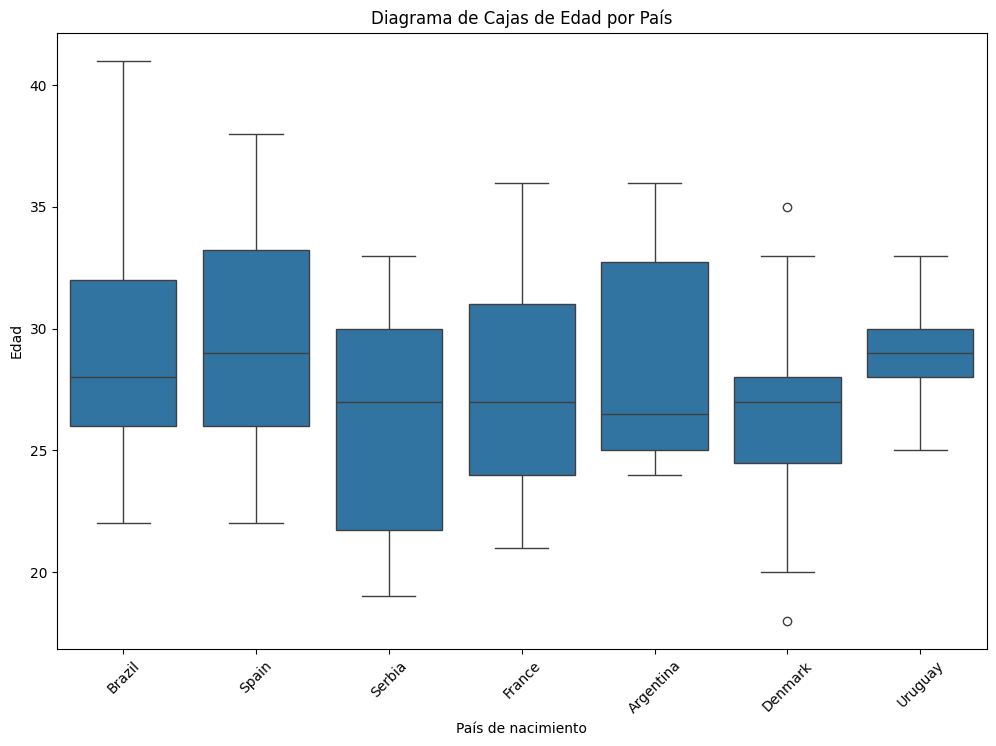

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una lista de países
paises = ['Brazil', 'Spain', 'Serbia', 'France', 'Argentina', 'Denmark', 'Uruguay']

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Generar el diagrama de cajas para cada país
sns.boxplot(data=df_football, x='País de nacimiento', y='Edad', order=paises)

# Añadir etiquetas y título al gráfico
plt.title('Diagrama de Cajas de Edad por País')
plt.xlabel('País de nacimiento')
plt.ylabel('Edad')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mejor legibilidad
plt.show()


Y una prueba de normalidad, la más común es la Shapiro-Wilk

In [28]:
from scipy.stats import shapiro

# Definir una lista de países
paises = ['Brazil', 'Spain', 'Serbia', 'France', 'Argentina', 'Denmark', 'Uruguay']

# Ciclo para cada país
for pais in paises:
    # Filtrar las edades para el país actual
    edades_pais = df_football[df_football['País de nacimiento'] == pais]['Edad']

    # Realizar prueba de normalidad (Shapiro-Wilk)
    stat, p_valor = shapiro(edades_pais)

    # Imprimir resultados
    print(f'Prueba de Normalidad (Shapiro-Wilk) para {pais}:')
    print(f'Estadístico de prueba: {stat}')
    print(f'Valor p: {p_valor}')

    # Interpretar el resultado
    alpha = 0.05
    if p_valor > alpha:
        print('La distribución parece normal (no se rechaza H0)')
    else:
        print('La distribución no parece normal (se rechaza H0)')

    print()


Prueba de Normalidad (Shapiro-Wilk) para Brazil:
Estadístico de prueba: 0.9107581377029419
Valor p: 0.013521453365683556
La distribución no parece normal (se rechaza H0)

Prueba de Normalidad (Shapiro-Wilk) para Spain:
Estadístico de prueba: 0.9482218623161316
Valor p: 0.06587576121091843
La distribución parece normal (no se rechaza H0)

Prueba de Normalidad (Shapiro-Wilk) para Serbia:
Estadístico de prueba: 0.9183467626571655
Valor p: 0.09208815544843674
La distribución parece normal (no se rechaza H0)

Prueba de Normalidad (Shapiro-Wilk) para France:
Estadístico de prueba: 0.9364556074142456
Valor p: 0.12256795167922974
La distribución parece normal (no se rechaza H0)

Prueba de Normalidad (Shapiro-Wilk) para Argentina:
Estadístico de prueba: 0.8381083607673645
Valor p: 0.0720221996307373
La distribución parece normal (no se rechaza H0)

Prueba de Normalidad (Shapiro-Wilk) para Denmark:
Estadístico de prueba: 0.961798369884491
Valor p: 0.6082813739776611
La distribución parece normal

La siguiente condición para poder hacer ANOVA TEST es comprobar la homocedastecidad de varianzas

Podremos hacer anova si las dos varianzas son iguales

Para ello podemos  visualizar de nuevo el gráfico de box plots, describe con la std parecida, hacer el test de barlet o de leven no queremos rechazar que las varianzas son iguales

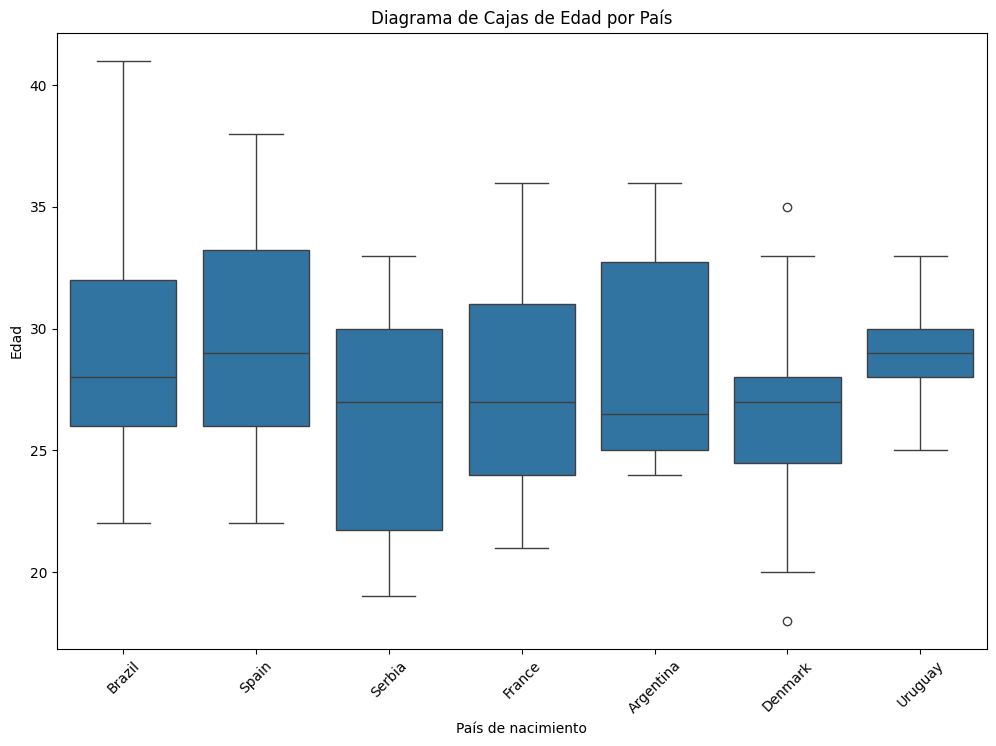

In [29]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Generar el diagrama de cajas para cada país
sns.boxplot(data=df_football, x='País de nacimiento', y='Edad', order=paises)

# Añadir etiquetas y título al gráfico
plt.title('Diagrama de Cajas de Edad por País')
plt.xlabel('País de nacimiento')
plt.ylabel('Edad')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mejor legibilidad
plt.show()


In [30]:
from scipy.stats import levene

# Obtener las edades para cada país
edades_por_pais = [df_football[df_football['País de nacimiento'] == pais]['Edad'] for pais in paises]

# Realizar el test de Levene
stat_levene, p_valor_levene = levene(*edades_por_pais)

# Imprimir resultados
print(f'Prueba de Levene - Estadístico: {stat_levene}, Valor p: {p_valor_levene}')

# Interpretación del resultado
alpha = 0.05
if p_valor_levene > alpha:
    print('La prueba de Levene no rechaza la igualdad de varianzas entre los grupos.')
else:
    print('La prueba de Levene rechaza la igualdad de varianzas entre los grupos.')


Prueba de Levene - Estadístico: 0.31411796477909293, Valor p: 0.9287732064812065
La prueba de Levene no rechaza la igualdad de varianzas entre los grupos.


Como el test de Levene no rechaza la igualdad de varianzas entre los grupos se cumple la segunda condición para poder hacer ANOVA

La muestra se ha recogido de forma independiente por lo que  se cumple  la tercera condición par apoder realizar el test ANOVA que necesita una muestra aleatoria con datos independientes


In [31]:


# Realizar ANOVA
anova_result = stats.f_oneway(edades_brasil, edades_espana, edades_serbia, edades_france, edades_argentina, edades_denmark, edades_uruguay)

# Imprimir los resultados
print("Estadístico F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

# Interpretar los resultados
if anova_result.pvalue < 0.05:
    print("Hay una diferencia significativa entre al menos dos grupos.")
else:
    print("No hay una diferencia significativa entre los grupos.")

Estadístico F: 2.0557696228000526
Valor p: 0.06223505767151893
No hay una diferencia significativa entre los grupos.


Aunque el P valor se ve que es a 0.06 a un 95 % no podría rechazar la hipotesis nula pero al 90% si

test de tuckey al 90 %

In [36]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas de país de nacimiento en números
label_encoder = LabelEncoder()
df_football['Codigo Pais'] = label_encoder.fit_transform(df_football['País de nacimiento'])

# Realizar el Test de Tukey
tukey_results = pairwise_tukeyhsd(endog=df_football['Edad'], groups=df_football['Codigo Pais'])

# Imprimir los resultados
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     0      1     3.75   nan   nan   nan  False
     0      2   2.4091   nan   nan   nan  False
     0      3   2.1818   nan   nan   nan  False
     0      4     1.75   nan   nan   nan  False
     0      5   4.3548   nan   nan   nan  False
     0      6      2.0   nan   nan   nan  False
     0      7  -2.6667   nan   nan   nan  False
     0      8      8.0   nan   nan   nan  False
     0      9      6.5   nan   nan   nan  False
     0     10      0.0   nan   nan   nan  False
     0     11      3.0   nan   nan   nan  False
     0     12   2.1176   nan   nan   nan  False
     0     13      5.0   nan   nan   nan  False
     0     14     4.35   nan   nan   nan  False
     0     15    -1.25   nan   nan   nan  False
     0     16   1.4211   nan   nan   nan  False
     0     17     -3.0   nan   nan   nan  False
     0     18     -5.0   nan   nan  

# **CONCLUSIÓN DEL ANÁLISIS ESTADÍSTICO**

Tras este completo análisis, hemos podido conocer mejor las caracteristicas de las variables asociadas a los defensores centrales en el fútbol, y nos ha permitido obtener información valiosa, que confirma mediante procesos estadísticos lo que ya se podía intuir, como por ejemplo la correlación negativa entre precio y edad del jugador.

Del mismo modo, también nos ha aportado insights valiosos e interesantes, como la necesidad de prestar atención a los casos en los que un jugador joven aparezca en la lista y su valor de mercado sea inferior a 10m€, ya que estaremos sin duda ante una situación de gran rareza (al menos, desde un punto de vista estadístico).

Para futuras líneas de investigación, sería interesante analizar cómo se comportan el resto de posiciones para ver si tienen un coportamiento similar al de la posición de Defensa central. Creemos fehacientemente que este tipo de estudio puede ayudar a generar un valor añadido diferencial al mundo del deporte, y al fútbol en particular.
